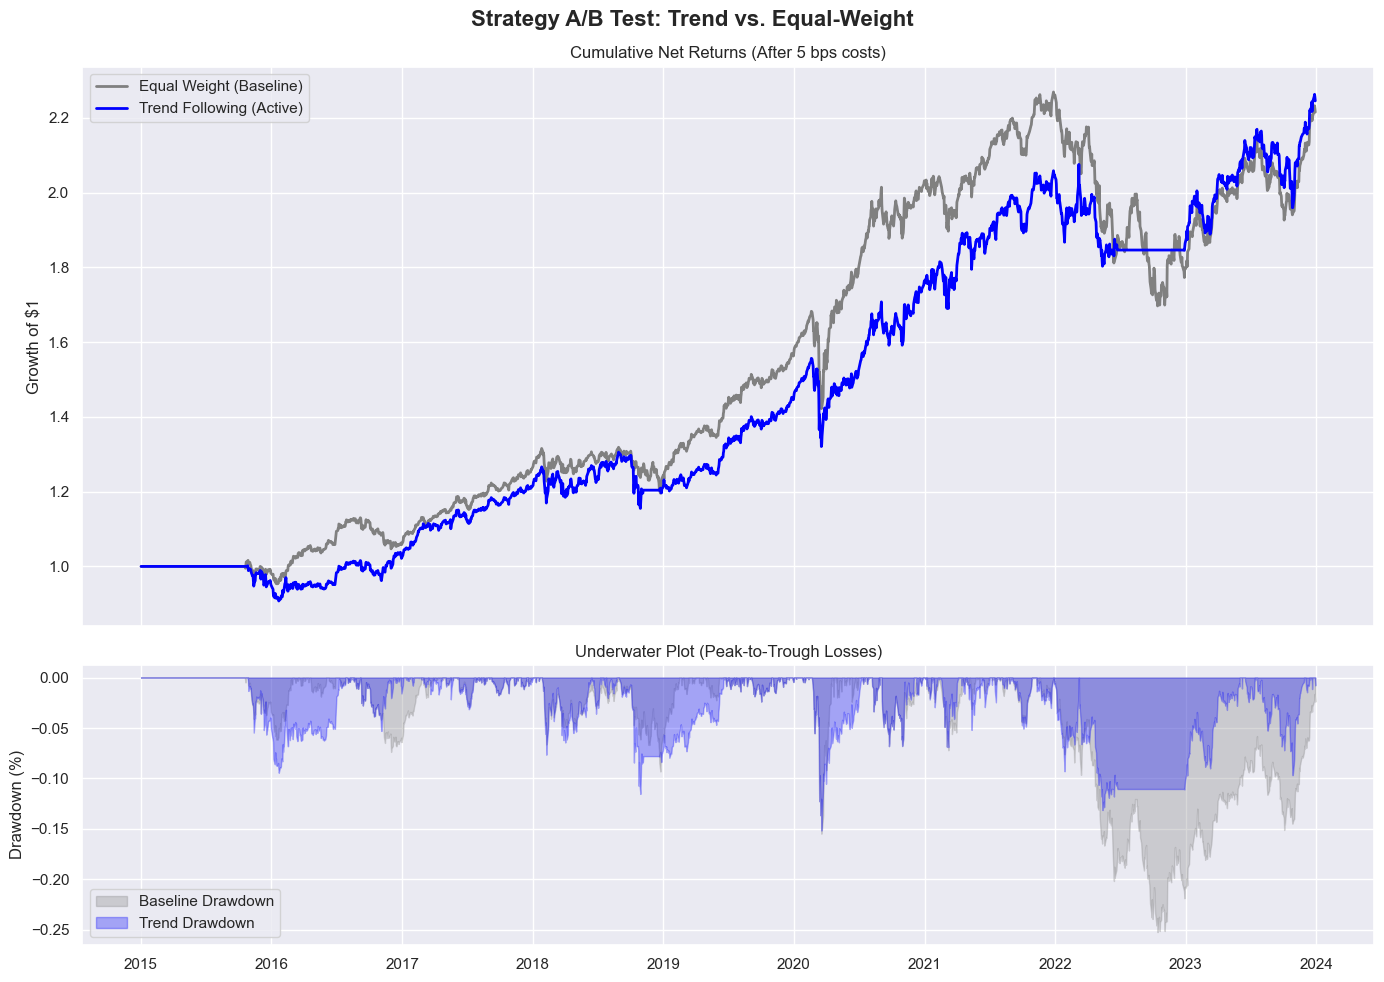

Baseline Worst Drawdown: -25.22%
Trend Worst Drawdown:    -15.16%


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

# 1. Load both sets of results
eq_weight = pd.read_parquet("../data/reports/backtest_results_equal_weight.parquet")
trend = pd.read_parquet("../data/reports/backtest_results_trend.parquet")

# 2. Calculate Drawdowns for both
eq_max = eq_weight['cumulative_net'].cummax()
eq_drawdown = (eq_weight['cumulative_net'] - eq_max) / eq_max

trend_max = trend['cumulative_net'].cummax()
trend_drawdown = (trend['cumulative_net'] - trend_max) / trend_max

# 3. Create the A/B Tearsheet
fig, axes = plt.subplots(2, 1, figsize=(14, 10), gridspec_kw={'height_ratios': [2, 1]}, sharex=True)
fig.suptitle('Strategy A/B Test: Trend vs. Equal-Weight', fontsize=16, fontweight='bold')

# --- Panel 1: Cumulative Equity Curve ---
axes[0].plot(eq_weight.index, eq_weight['cumulative_net'], color='gray', linewidth=2, label='Equal Weight (Baseline)')
axes[0].plot(trend.index, trend['cumulative_net'], color='blue', linewidth=2, label='Trend Following (Active)')
axes[0].set_ylabel('Growth of $1')
axes[0].set_title('Cumulative Net Returns (After 5 bps costs)')
axes[0].legend(loc='upper left')

# --- Panel 2: The Underwater Plot ---
axes[1].fill_between(eq_drawdown.index, eq_drawdown, 0, color='gray', alpha=0.3, label='Baseline Drawdown')
axes[1].fill_between(trend_drawdown.index, trend_drawdown, 0, color='blue', alpha=0.3, label='Trend Drawdown')
axes[1].set_ylabel('Drawdown (%)')
axes[1].set_title('Underwater Plot (Peak-to-Trough Losses)')
axes[1].legend(loc='lower left')

plt.tight_layout()
plt.show()

print(f"Baseline Worst Drawdown: {eq_drawdown.min() * 100:.2f}%")
print(f"Trend Worst Drawdown:    {trend_drawdown.min() * 100:.2f}%")